In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv('survey_results_public.csv')
df

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,65433,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Apples,Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65433,65434,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65434,65435,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Social ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65435,65436,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


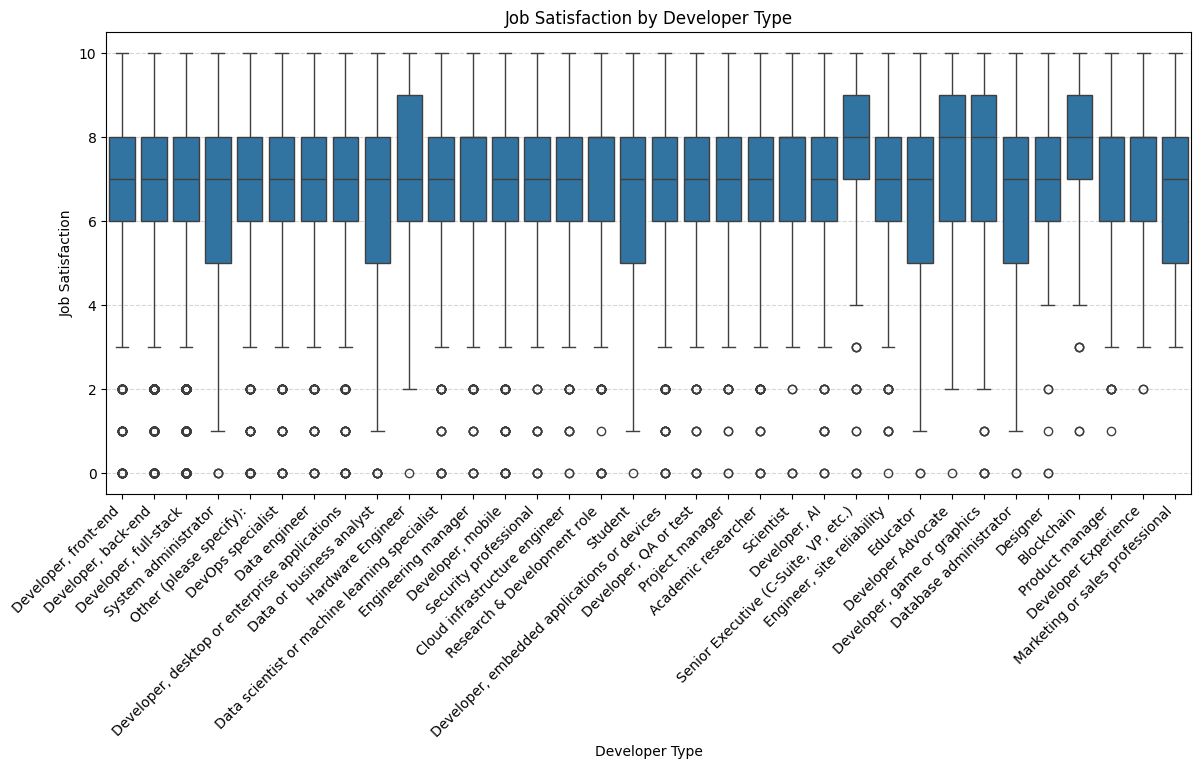

In [3]:
df_filtered= df[['DevType', 'JobSat']].dropna().sort_values(by='JobSat')
plt.figure(figsize=(14, 6))
sns.boxplot(x='DevType', y='JobSat', data=df_filtered, order=df_filtered['DevType'].unique())
plt.xticks(rotation=45, ha='right')
plt.xlabel("Developer Type")
plt.ylabel("Job Satisfaction")
plt.title("Job Satisfaction by Developer Type")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [4]:
extra=['ResponseId','Check','SurveyLength', 'SurveyEase',]
df.drop(extra,inplace=True,axis=1)
columns_list = df.columns.tolist()
print(columns_list)

['MainBranch', 'Age', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith', 'OfficeStackAsyncAdmir

<BarContainer object of 9 artists>

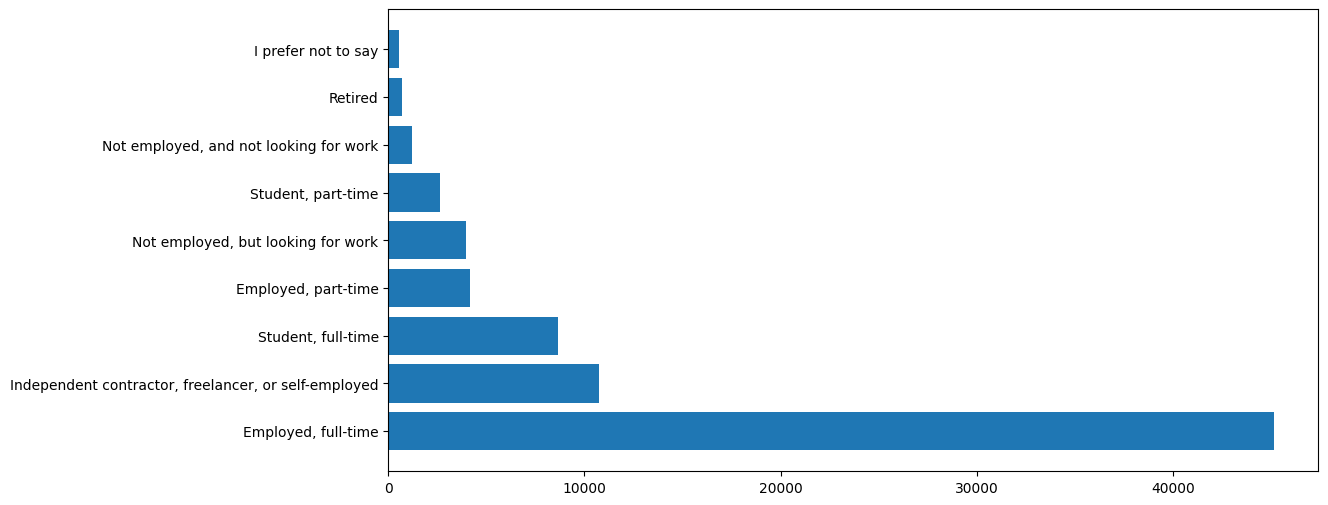

In [5]:
employment = df['Employment'].dropna().str.split(";").explode()
employment_counts = Counter(employment)
employment_series = pd.Series(employment_counts).sort_values(ascending=False)
plt.figure(figsize=(12, 6))
plt.barh(employment_series.index, employment_series.values)

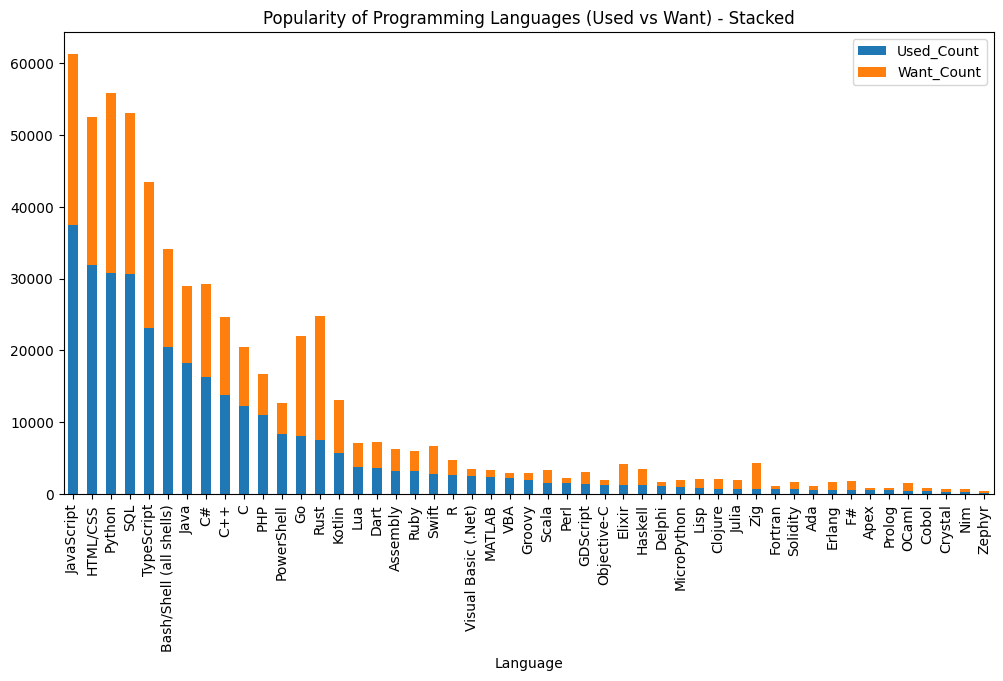

In [6]:
languages = df["LanguageHaveWorkedWith"].dropna().str.split(";").explode()
lang_counts = Counter(languages)
lang_df = pd.DataFrame({'Language': lang_counts.keys(), 'Used_Count': lang_counts.values()})
languages_want = df['LanguageWantToWorkWith'].dropna().str.split(";").explode()
lang_want_counts = Counter(languages_want)
lang_want_df = pd.DataFrame({'Language': lang_want_counts.keys(), 'Want_Count': lang_want_counts.values()})
merged_df = pd.merge(lang_df, lang_want_df, on='Language', how='outer')
df2plot = merged_df.set_index('Language')[['Used_Count', 'Want_Count']].sort_values(by=['Used_Count', 'Want_Count'], ascending=False)
df2plot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Popularity of Programming Languages (Used vs Want) - Stacked')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'AI usage by devs')

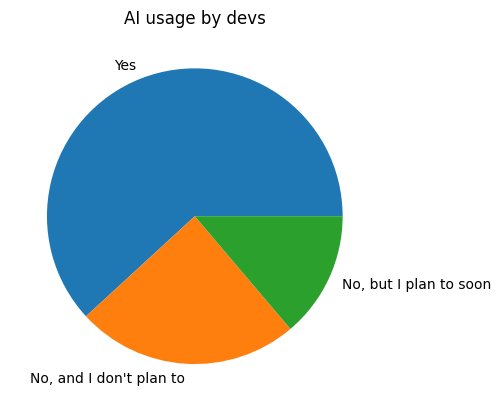

In [7]:
plt.pie(df['AISelect'].value_counts(),labels=df['AISelect'].unique()[:-1])
plt.title('AI usage by devs')

In [8]:
#categorical(ordinal)>>>numerical
#not sorted
from sklearn.preprocessing import OrdinalEncoder
age_dict={'Prefer not to say':0,'Under 18 years old':1,'18-24 years old':2,'25-34 years old':3,
          '35-44 years old':4,'45-54 years old':5,'55-64 years old':6,'65 years or older':7}
reverse_age_dict={v:k for k,v in age_dict.items()}
df.Age=df.Age.map(age_dict).fillna(0)

edu_dict={'Something else':0,'Primary/elementary school':1,'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)':2,
          'Some college/university study without earning a degree':3,
          'Associate degree (A.A., A.S., etc.)':4,'Bachelor’s degree (B.A., B.S., B.Eng., etc.)':5,
          'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)':6,'Professional degree (JD, MD, Ph.D, Ed.D, etc.)':7}
reverse_edu_dict={v:k for k,v in edu_dict.items()}
df.EdLevel=df.EdLevel.map(edu_dict)
df.EdLevel = df.EdLevel.fillna(0).astype(int)


df['PurchaseInfluence'] = df['PurchaseInfluence'].fillna('Unknown')
influence_enc = OrdinalEncoder(categories=[[
    'Unknown',
    'I have little or no influence',
    'I have some influence',
    'I have a great deal of influence',
]])
df.PurchaseInfluence=influence_enc.fit_transform(df[['PurchaseInfluence']])

C:\Users\User\AppData\Local\Temp\ipykernel_4368\3200497427.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '12.550190466385258' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_resources.at[idx, 'Percentage'] = (row['Count'] / total_lowedu) * 100


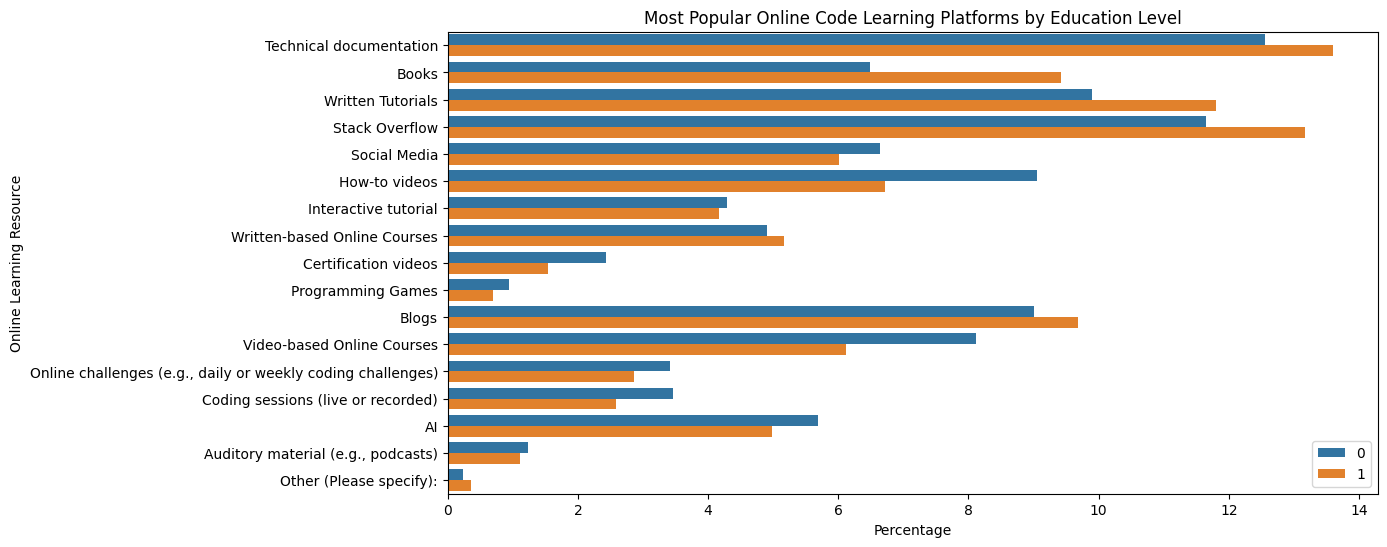

In [9]:
dff = df[df['EdLevel'].isin([4, 7])].copy()
dff['EdLevel'] = dff['EdLevel'].replace({4: 0, 7: 1})
resources = dff[['LearnCodeOnline', 'EdLevel']].dropna()
resources['Resource'] = resources['LearnCodeOnline'].str.split(";")
resources = resources.explode('Resource')
lowedu_counts = Counter(resources.loc[resources['EdLevel'] == 0, 'Resource'])
highedu_counts = Counter(resources.loc[resources['EdLevel'] == 1, 'Resource'])
df_lowedu = pd.DataFrame(lowedu_counts.items(), columns=['Resource', 'Count'])
df_lowedu['EdLevel'] = 0
df_highedu = pd.DataFrame(highedu_counts.items(), columns=['Resource', 'Count'])
df_highedu['EdLevel'] = 1
df_resources = pd.concat([df_lowedu, df_highedu], ignore_index=True)
total_lowedu = df_lowedu['Count'].sum()
total_highedu = df_highedu['Count'].sum()
df_resources['Percentage'] = 0
for idx, row in df_resources.iterrows():
    if row['EdLevel'] == 0:
        df_resources.at[idx, 'Percentage'] = (row['Count'] / total_lowedu) * 100
    else:
        df_resources.at[idx, 'Percentage'] = (row['Count'] / total_highedu) * 100

plt.figure(figsize=(12, 6))
sns.barplot(x='Percentage', y='Resource', hue='EdLevel', data=df_resources)
plt.xlabel("Percentage")
plt.ylabel("Online Learning Resource")
plt.title("Most Popular Online Code Learning Platforms by Education Level")
plt.legend()
plt.show()

In [10]:
df['OrgSize'] = df['OrgSize'].fillna('Unknown')
orgSize_enc = OrdinalEncoder(categories=[[
    'Unknown',
    'Just me - I am a freelancer, sole proprietor, etc.',
    '2 to 9 employees',
    '10 to 19 employees',
    '20 to 99 employees',
    '100 to 499 employees',
    '500 to 999 employees',
    '1,000 to 4,999 employees',
    '5,000 to 9,999 employees',
    '10,000 or more employees',
]],handle_unknown='use_encoded_value',  # Handle unknown categories
    unknown_value=-1)
df.OrgSize=orgSize_enc.fit_transform(df[['OrgSize']])

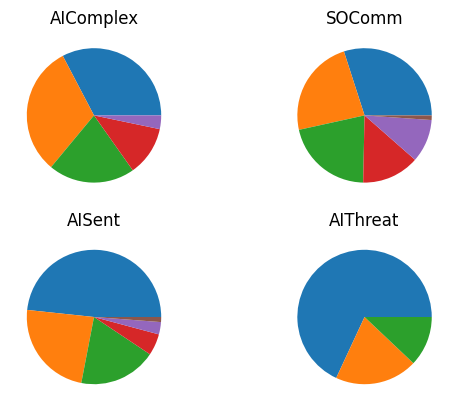

In [11]:
frequency_nominal=['AIComplex','SOComm',
                   'AISent','AIThreat']
for i,col in enumerate(frequency_nominal):
    plt.subplot(2,2,i+1)
    plt.pie(df[col].value_counts())
    plt.title(col)
plt.show()

In [12]:
#Frequency Encoding:categorical(nominal)>>>numerical
for i,col in enumerate(frequency_nominal):
    df[col] = df[col].map(df[col].value_counts(normalize=True))

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['RemoteWork'] = le.fit_transform(df['RemoteWork'])
df['DevType']=le.fit_transform(df['DevType'])
df['AISelect']=le.fit_transform(df['AISelect'])
df['AIChallenges'] = le.fit_transform(df['AIChallenges'])
df['Country'] = le.fit_transform(df['Country'])
df['SOVisitFreq'] = le.fit_transform(df['SOVisitFreq'])
df['MainBranch'] = le.fit_transform(df['MainBranch'])
df['LanguageAdmired'] = le.fit_transform(df['LanguageAdmired'])
df['PlatformAdmired'] = le.fit_transform(df['PlatformAdmired'])
df['WebframeAdmired'] = le.fit_transform(df['WebframeAdmired'])
df['SOAccount'] = le.fit_transform(df['SOAccount'])
df['Employment'] = le.fit_transform(df['Employment'])


In [14]:
def clean_year(x):
    if x == 'Less than 1 year':
        return 0
    elif x == 'More than 50 years':
        return 51
    else:
        return x
df['YearsCode'] = df['YearsCode'].apply(clean_year).fillna(-1).astype(int)
df['YearsCodePro'] = df['YearsCodePro'].apply(clean_year).fillna(-1).astype(int)
df['WorkExp'] = df['WorkExp'].fillna(-1)

In [15]:
df_2 = df[['LanguageAdmired', 'PlatformAdmired', 'WebframeAdmired', 'DevType','Employment','MainBranch']]

In [16]:
x2=df_2.iloc[:,:-1]
y2=df_2.iloc[:,-1]
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.2,random_state=42,stratify=y2)

In [17]:
rf=RandomForestClassifier(max_depth=12,random_state=42)
rf.fit(x2_train,y2_train)
rf.score(x2_train,y2_train),rf.score(x2_test,y2_test)

(0.844810789126822, 0.801039119804401)